# Описательная статистика датасета Титаник.

## Загрузим необходимые пакеты

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Прочитаем таблицу и посмотрим на первые строки.

In [4]:
df = pd.read_csv('/home/daria/Bioinf/python/Bioinf/s_task/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Посмотрим структуру датасета.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Есть пропущенные значения в столбцах Age и Cabin.

Посмотрим основные значения по колонкам.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Количество выживших пассажиров.

Посмотрим, сколько пассажиров выжило и сколько нет.

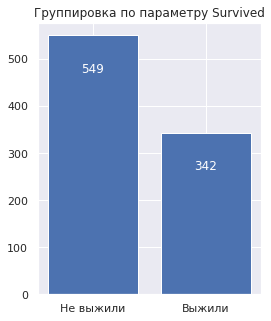

In [62]:
survived_count = df.groupby('Survived')['Survived'].count()

plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Группировка по параметру Survived')
plt.xticks([0,1],['Не выжили', 'Выжили'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Сколько в процентном соотношении было выживших?

In [16]:
print(round(df.Survived.sum()/df.Survived.count()*100))

38


Посмотрим соотношение выживших в зависимости от пола.

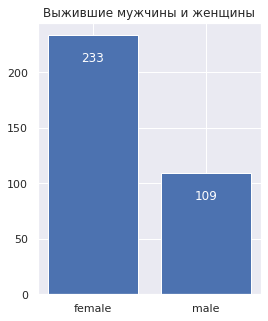

In [63]:
survived_sex = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Выжившие мужчины и женщины')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [24]:
print("% выживших женщин: " , round((df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())*100))
print("% выживших мужчин: " , round((df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())*100))

% выживших женщин:  74
% выживших мужчин:  19


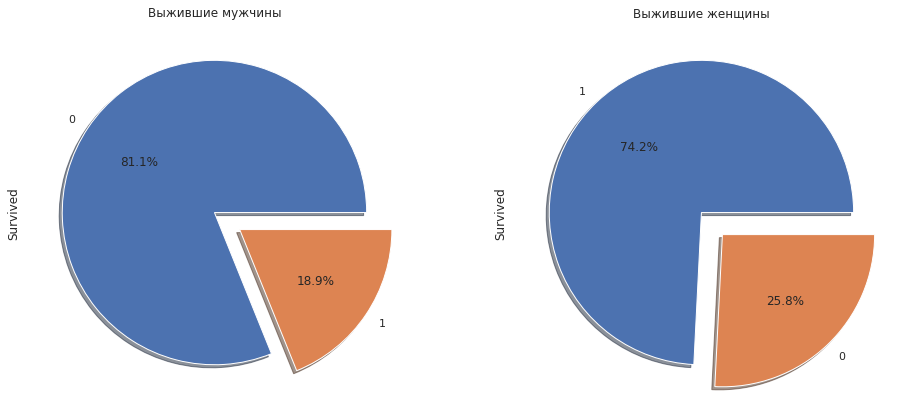

In [64]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Выжившие мужчины')
ax[1].set_title('Выжившие женщины')

plt.show()

/home/daria/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daria/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daria/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

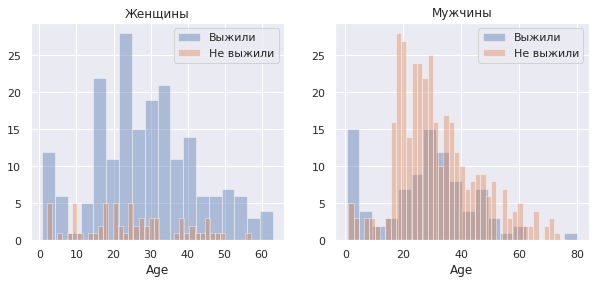

In [67]:
survived = 'Выжили'
not_survived = 'Не выжили'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Женщины')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Мужчины')

Моджно увидеть, что мужчины имеют высокую вероятность выживания в возрасте от 18 до 50 лет, что в некоторой степени верно и для женщин. У женщин шансы на выживание выше в возрасте от 14 до 40 лет. 

У мужчин вероятность выживания в возрасте от 5 до 18 лет очень мала. Следует также отметить, что вероятность выживания у младенцев немного выше. 

Такое распределение говорит о корреляции возраста и выживания.

Посмотрим распределение пассажиров в зависимости от класса.

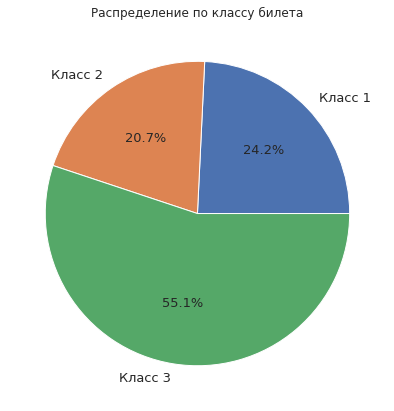

In [69]:
pclass_count = df.groupby('Pclass')['Pclass'].count()

plt.figure(figsize=(7,7))
plt.title("Распределение по классу билета")
plt.pie(pclass_count.values, labels=["Класс 1", "Класс 2", "Класс 3"], 
 autopct="%1.1f%%", textprops={"fontsize":13})
plt.show()

/home/daria/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


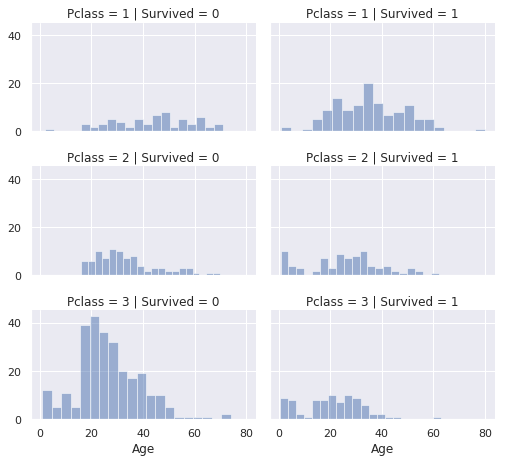

In [70]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Похоже, что класс билета влияет на выживаемость пассажиров в определенном возрасте. Однако, это может быть также следствием, что у более старших пассажиров больше денег и соответственно, и класс выше.

Распределение пассажиров по полу.

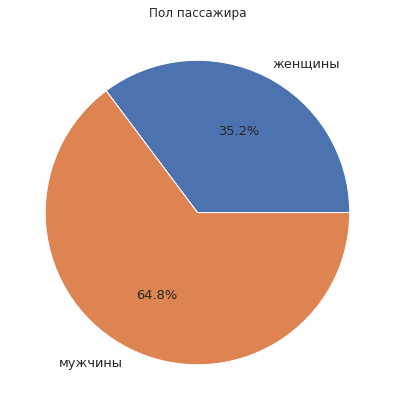

In [72]:
pclass_count = df.groupby('Sex')['Sex'].count()

plt.figure(figsize=(7,7))
plt.title("Пол пассажира")
plt.pie(pclass_count.values, labels=["женщины", "мужчины"], 
 autopct="%1.1f%%", textprops={"fontsize":13})
plt.show()

In [34]:
pclass_count = df.groupby('Embarked')['Embarked'].count()
pclass_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

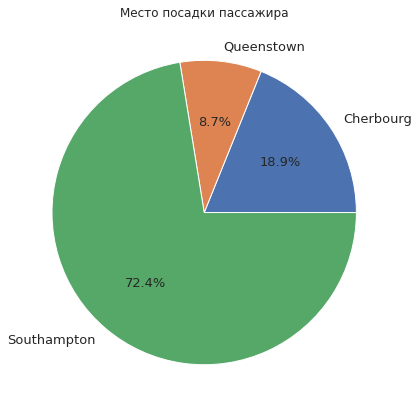

In [74]:
pclass_count = df.groupby('Embarked')['Embarked'].count()

plt.figure(figsize=(7,7))
plt.title("Место посадки пассажира")
plt.pie(pclass_count.values, labels=["Cherbourg", "Queenstown", "Southampton"], 
 autopct="%1.1f%%", textprops={"fontsize":13})
plt.show()

Посмотрим на распределение по возрасту.
Для этого введем возрастные когорты по 10 лет.

In [37]:
ages = df[df['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [39]:
ages_hist_labels = ["0–10", "11–20", "21–30", "31–40", "41–50", "51–60", "61–70", "71–80", "81–90"]

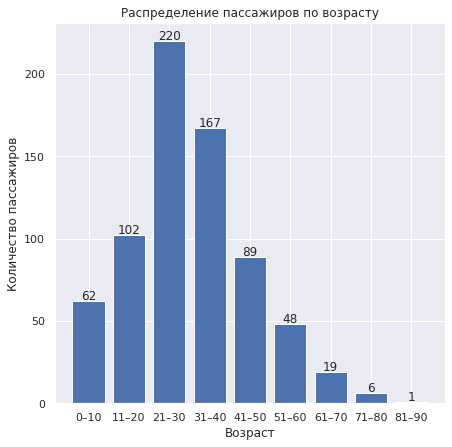

In [75]:
plt.figure(figsize=(7,7))
plt.title('Распределение пассажиров по возрасту')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

Распределение близко к нормальному, с небольшим хвостом справа. 

Можно было бы посмотреть распределение по каютам, однако, у нас есть информация только о четверти пассажиров, при таком малом количестве информации, мне кажется, нам не даст это ничего нового. Кроме того, эта информация коррелирует с классом и стоимостью билета пассажира. 

Распределение пассажиров по стоимости их билетов.

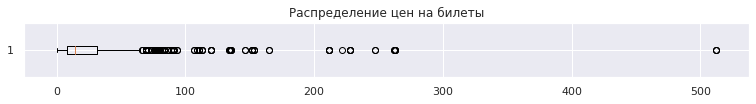

In [76]:
plt.figure(figsize=(13,1))
plt.title("Распределение цен на билеты")
plt.boxplot(df["Fare"], vert = False)
plt.show()

Распределение сильно смещено вправо, большая часть билетов находится между 20 и 200 долларами. 

## Вероятность выживания и корреляции.

In [ ]:
Посчитаем вероятность на выживание пассажиров разных возрастов.

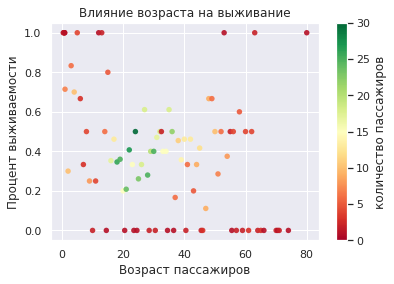

In [77]:

age_data = df.groupby('Age', as_index = False)
age_mean_data = age_data.mean()


age_list = age_mean_data['Age'].tolist()


num_passengers_in_age = age_data.count()['PassengerId']


scatter_plot1 = plt.scatter(age_mean_data['Age'], age_mean_data['Survived'], s = 30, \
    alpha = 0.9, c = num_passengers_in_age, cmap='RdYlGn', edgecolors='none', vmin = 0, vmax = 30)
plt.title('Влияние возраста на выживание')
plt.colorbar(scatter_plot1, label = 'количество пассажиров')
plt.ylabel('Процент выживаемости')
plt.xlabel('Возраст пассажиров')
plt.show()

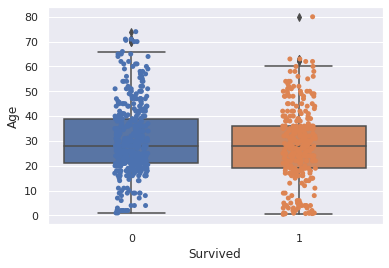

In [78]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=df, jitter=True,
                   edgecolor="gray")


Однако, не нужно забывать, что некоторые возрастные группы могли быть непрезентативно представлены. Мы видели ранее, что есть только один пассажир 80-90 лет, соответственно для этой (и некоторых других групп) данная вероятность сожет быть ошибочна.

Построим графики распределения пассажиров по возрасту в зависимости от класса.

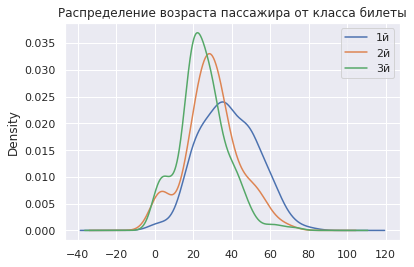

In [79]:
for x in [1,2,3]:    ## for 3 classes
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Распределение возраста пассажира от класса билеты")
plt.legend(("1й","2й","3й"))

Мы видим, что более взрослые пассажиры покупали билеты более высокого класса.

Построим корреляции.

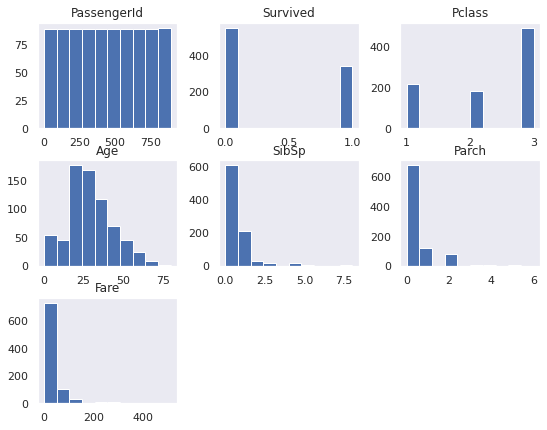

In [52]:

df.hist(bins=10,figsize=(9,7),grid=False);

Мы видим, что параметры не стандартизированы, сделаем скалирование.

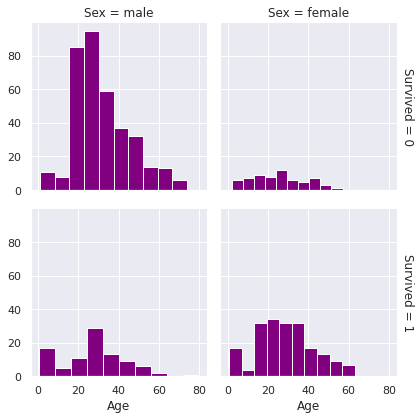

In [53]:
g = sns.FacetGrid(df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

Визуализируем отношения между полом, возрастом и ценой билета.

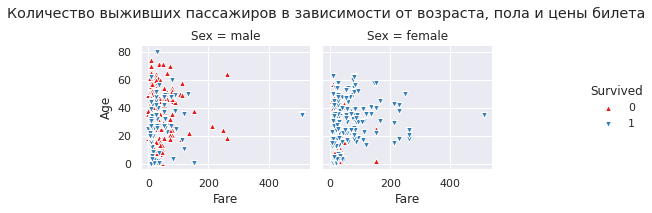

In [80]:
g = sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Количество выживших пассажиров в зависимости от возраста, пола и цены билета');

In [ ]:
Построим матрицу корреляций.

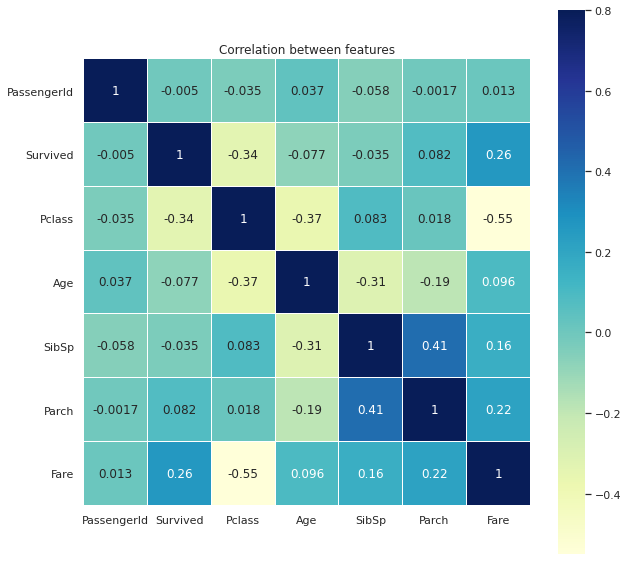

In [57]:
corr=df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Корреляции между признаками');

Коэффициенты корреляций параметров в целом низкие, заметно коррелируют параметры Parch и SibSp и Survived положительно с Fare и отрицательно с Pclass, а также Fare и Pclass - что, в общем, очевидно, поскольку с ценой уменьшается класс (по значению). 

In [59]:
df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Поскольку Fare и Pclass отрицательно коррелируют друг с другом и с разными знаками с Survived, при построении модели я бы использовала один из признаков (Fare или Pclass).